      RESULTADOS NUMÉRICOS DO PROJETO

Ordem necessária para o filtro: n = 6
Frequências de corte ideais (Wn): [1884.35, 18855.66] rad/s

--- MÉTODO 1: PROJETO DIRETO ---
Coeficientes (b, a) obtidos pelo método direto:
b: [2.38942286e+25 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
a: [1.00000000e+00 6.55721271e+04 2.36303538e+09 5.63348919e+13
 9.43690504e+17 1.10307143e+22 8.50773770e+25 3.91927633e+29
 1.19133548e+33 2.52687759e+36 3.76599040e+39 3.71304748e+42
 2.01193283e+45]

--- MÉTODO 2: PROJETO PASSO A PASSO ---
   - Frequência Central (wo): 5960.75 rad/s
   - Largura de Banda (bw): 16971.32 rad/s
Coeficientes (b, a) obtidos pelo método passo a passo:
b: [2.38942286e+25 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
a: [1.00000000e+00 6.55721271e+04 2.36303538e+09 5.63348919e+13
 9.43690504e+17 1.10307143e+22 8.50773770e+25 3.91927633e+29
 1.19133548e+33 2.52687759e+36 3.76599040e+39 3.

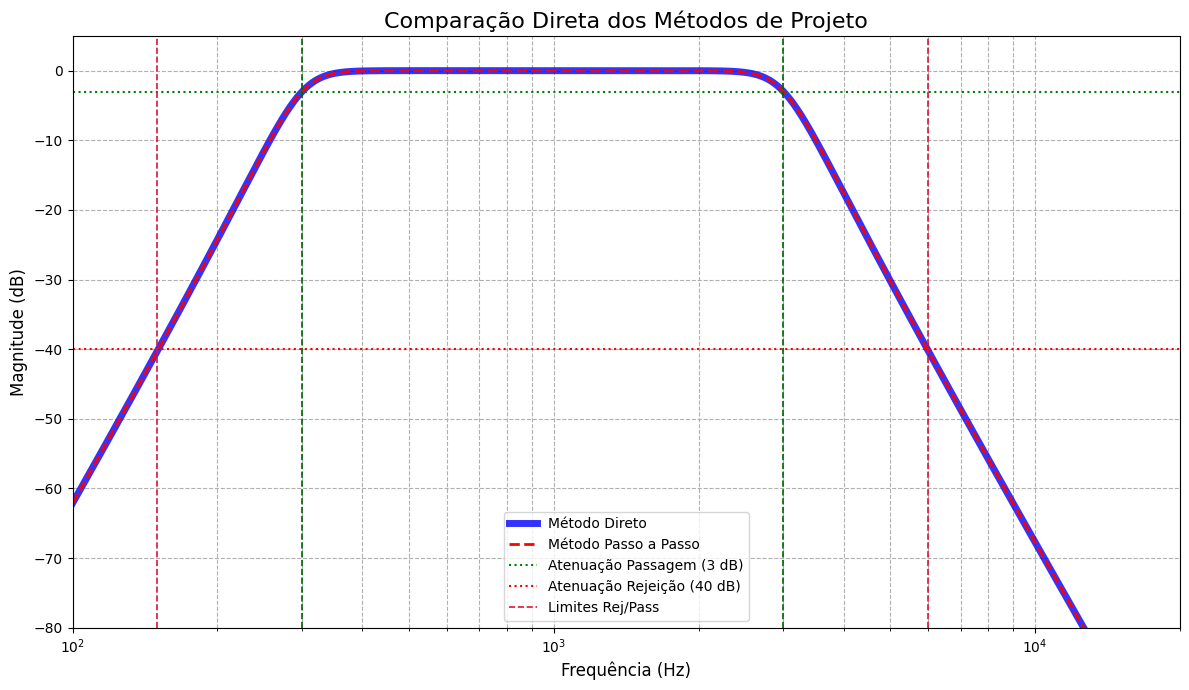

In [ ]:
# =============================================================================
#       COMPARAÇÃO DE MÉTODOS DE PROJETO DE FILTROS ANALÓGICOS EM SCIPY
# =============================================================================
#
# Autor: [Marcel Luiz Basso]
# Data: 22 de setembro de 2025
#
# Objetivo:
# Este script tem como finalidade demonstrar de forma prática e visual que o
# projeto de um filtro analógico Passa-Faixa Butterworth utilizando duas
# abordagens distintas na biblioteca SciPy leva a resultados idênticos.
#
# A comparação valida que a função de alto nível da biblioteca (Método Direto)
# é uma abstração correta e eficiente do processo teórico clássico, que envolve
# o uso de um protótipo normalizado e transformações de frequência vistos em
# sala de aula e literatura.
#
# Métodos Comparados:
# 1. Método Direto: Utiliza a função `signal.butter` diretamente com os
#    parâmetros do filtro passa-faixa (`btype='bandpass'`).
#
# 2. Método Clássico (Passo a Passo): Consiste em:
#    a) Projetar um protótipo de filtro Passa-Baixas normalizado.
#    b) Aplicar a transformação de frequência de Passa-Baixas para
#       Passa-Faixa (`signal.lp2bp`).
#
# Bibliotecas Principais:
# - NumPy: Para manipulação de arrays e operações matemáticas.
# - SciPy.signal: Para o projeto, análise e transformação de filtros.
# - Matplotlib: Para a visualização gráfica dos resultados.
#
# Resultado Esperado:
# O script irá gerar um único gráfico contendo a resposta em magnitude (dB)
# dos filtros projetados por ambos os métodos. As duas curvas devem se
# sobrepor perfeitamente, provando a equivalência numérica e funcional
# entre as duas abordagens.
#
# =============================================================================


# --- 1. IMPORTAÇÃO DAS BIBLIOTECAS E CONFIGURAÇÕES ---
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# --- 2. ESPECIFICAÇÕES DO FILTRO ---
fp = [300, 3000]  # Hz
fs = [150, 6000]  # Hz
ap = 3            # dB
as_ = 40          # dB

# Converter para rad/s
wp = 2 * np.pi * np.array(fp)
ws = 2 * np.pi * np.array(fs)

# --- 3. CÁLCULO DA ORDEM (COMUM AOS DOIS MÉTODOS) ---
n, Wn = signal.buttord(wp, ws, ap, as_, analog=True)


# ===================== 4. MÉTODO 1: PROJETO DIRETO ==========================
b_direto, a_direto = signal.butter(n, Wn, btype='bandpass', analog=True, output='ba')


# ====== 5. MÉTODO 2: PROJETO PASSO A PASSO (PROTÓTIPO + TRANSFORMAÇÃO) =======
# a) Protótipo Passa-Baixas normalizado
b_proto, a_proto = signal.butter(n, 1, btype='low', analog=True, output='ba')

# b) Cálculo de wo e bw para a transformação
wo = np.sqrt(Wn[0] * Wn[1])
bw = Wn[1] - Wn[0]

# c) Aplicação da transformação lp2bp
b_passo, a_passo = signal.lp2bp(b_proto, a_proto, wo=wo, bw=bw)


# --- 6. ANÁLISE DOS RESULTADOS E PLOTAGEM PARA COMPARAÇÃO ---

# --- EXIBIÇÃO DOS DADOS CALCULADOS ---
print("="*50)
print("      RESULTADOS NUMÉRICOS DO PROJETO")
print("="*50)

print(f"\nOrdem necessária para o filtro: n = {n}")
print(f"Frequências de corte ideais (Wn): [{Wn[0]:.2f}, {Wn[1]:.2f}] rad/s")

print("\n--- MÉTODO 1: PROJETO DIRETO ---")
print("Coeficientes (b, a) obtidos pelo método direto:")
print("b:", np.round(b_direto, 4))
print("a:", np.round(a_direto, 4))

print("\n--- MÉTODO 2: PROJETO PASSO A PASSO ---")
print(f"   - Frequência Central (wo): {wo:.2f} rad/s")
print(f"   - Largura de Banda (bw): {bw:.2f} rad/s")
print("Coeficientes (b, a) obtidos pelo método passo a passo:")
print("b:", np.round(b_passo, 4))
print("a:", np.round(a_passo, 4))
print("\n") # Adiciona um espaço antes do gráfico


# ----------------------- PLOTAGEM GRÁFICA ----------------------------

# Define a faixa de frequência para a análise (em rad/s)
w_vec = np.logspace(np.log10(100), np.log10(20000), 2000) * 2 * np.pi

# Calcula a resposta de Bode para os dois métodos (já retorna magnitude em dB)
w1, mag1, _ = signal.bode((b_direto, a_direto), w=w_vec)
w2, mag2, _ = signal.bode((b_passo, a_passo), w=w_vec)

# Converte a frequência para Hz para o eixo do gráfico
freq_hz = w1 / (2 * np.pi)

# Cria a figura e plota as duas curvas no mesmo gráfico
plt.figure(figsize=(12, 7))
plt.title('Comparação Direta dos Métodos de Projeto', fontsize=16)

# Plota uma linha grossa azul e por cima uma linha tracejada vermelha
plt.semilogx(freq_hz, mag1, 'b-', label='Método Direto', linewidth=5, alpha=0.8)
plt.semilogx(freq_hz, mag2, 'r--', label='Método Passo a Passo', linewidth=2)

# Adiciona elementos essenciais para dar contexto ao gráfico
plt.xlabel('Frequência (Hz)', fontsize=12)
plt.ylabel('Magnitude (dB)', fontsize=12)
plt.grid(True, which="both", ls="--")
plt.axhline(-ap, color='green', linestyle=':', label=f'Atenuação Passagem ({ap} dB)')
plt.axhline(-as_, color='red', linestyle=':', label=f'Atenuação Rejeição ({as_} dB)')

# --- ADICIONA OS LIMITES DE FREQUÊNCIA ---
# Limites da banda de rejeição
plt.axvline(fs[0], color='crimson', linestyle='--', linewidth=1.2, label=f'Limites Rej/Pass')
plt.axvline(fs[1], color='crimson', linestyle='--', linewidth=1.2)
# Limites da banda de passagem
plt.axvline(fp[0], color='darkgreen', linestyle='--', linewidth=1.2)
plt.axvline(fp[1], color='darkgreen', linestyle='--', linewidth=1.2)

plt.ylim(-80, 5)
plt.xlim(100, 20000)
plt.legend()

# Mostra o gráfico
plt.tight_layout()
plt.show()

In [ ]:
# ==============================================================
# Exemplo: Conversão de uma Função de Transferência para ZPK
# --------------------------------------------------------------
# Objetivo:
# Mostrar como um filtro dado em forma polinomial (coeficientes b, a)
# pode ser convertido para a forma Zeros, Polos e Ganho (ZPK).
#
# Teoria:
#   H(s) = (s^2 + 2s + 2) / (s^2 + 3s + 2)
#
#   - O numerador define os ZEROS (raízes do polinômio de cima).
#   - O denominador define os POLOS (raízes do polinômio de baixo).
#   - O fator de escala é o GANHO (k).
#
# Implementação:
# Usaremos a função signal.tf2zpk(b, a), que converte a representação
# em polinômios (b, a) para ZPK.
# ==============================================================

import numpy as np
from scipy import signal

# Coeficientes do numerador (s^2 + 2s + 2) e denominador (s^2 + 3s + 2)
b = [1, 2, 2]   # Numerador
a = [1, 3, 2]   # Denominador

# Conversão para Zeros, Polos e Ganho
z, p, k = signal.tf2zpk(b, a)

# Exibição dos resultados
print("Zeros:", z)
print("Polos:", p)
print("Ganho:", k)


Zeros: [-1.+1.j -1.-1.j]
Polos: [-2. -1.]
Ganho: 1.0


In [ ]:
#=============== FORMATO SOS =================


from scipy import signal
import numpy as np

# Passo 1: Projetar o Filtro Butterworth de 4a ordem
sos = signal.butter(4, 1, 'lp', analog=True, output='sos')

# Passo 2: Exibir os Coeficientes SOS
print(np.round(sos, 4))



[[0.     0.     1.     1.     1.8478 1.    ]
 [0.     0.     1.     1.     0.7654 1.    ]]


Ordem do Filtro: 6
Frequência de corte Wn (rad/s): 6285.672340230411
Matriz SOS:
[[0.00000000e+00 0.00000000e+00 6.16751806e+22 1.00000000e+00
  1.21429865e+04 3.95096768e+07]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  8.88928310e+03 3.95096768e+07]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  3.25370340e+03 3.95096768e+07]]


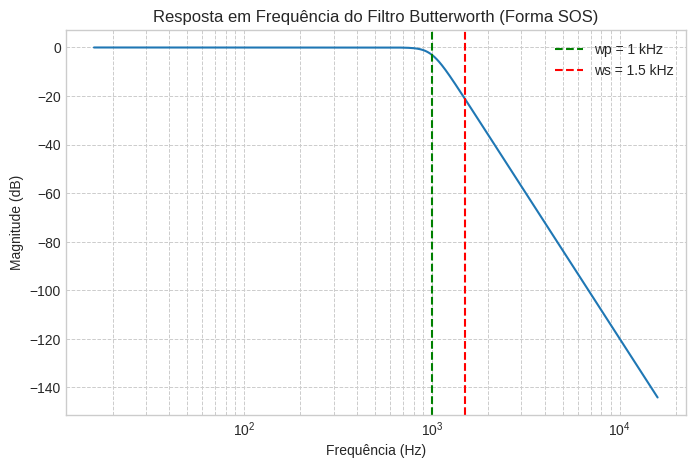

In [ ]:
# ==============================================================
# Exemplo 1: Filtro Passa-Baixas Butterworth
# ==============================================================

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# ------------------------------
# Especificações do filtro
# ------------------------------
wp = 2 * np.pi * 1000   # Frequência de passagem (rad/s)
ws = 2 * np.pi * 1500   # Frequência de rejeição (rad/s)
ap = 3                  # Atenuação máxima na banda passante (dB)
as_ = 20                # Atenuação mínima na banda de rejeição (dB)

# ------------------------------
# Projeto do filtro
# ------------------------------
n, Wn = signal.buttord(wp, ws, ap, as_, analog=True)
sos = signal.butter(n, Wn, btype='lowpass', analog=True, output='sos')

print("==================================================")
print("Ordem do Filtro:", n)
print("Frequência de corte Wn (rad/s):", Wn)
print("Matriz SOS:")
print(np.round(sos, 4))
print("==================================================")

# ------------------------------
# Converter SOS -> (b, a)
# ------------------------------
b, a = signal.sos2tf(sos)

# ------------------------------
# Resposta em frequência
# ------------------------------
w, h = signal.freqs(b, a, worN=2000)

plt.figure(figsize=(8, 5))
plt.semilogx(w/(2*np.pi), 20 * np.log10(abs(h)))
plt.title('Resposta em Frequência do Filtro Butterworth (Forma SOS)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', linestyle='--', linewidth=0.7)
plt.axvline(1000, color='green', linestyle='--', label='wp = 1 kHz')
plt.axvline(1500, color='red', linestyle='--', label='ws = 1.5 kHz')
plt.legend()
plt.show()


Ordem do Filtro: 6
Frequência de corte Wn (rad/s): 6285.672340230411
Matriz SOS:
[[0.00000000e+00 0.00000000e+00 6.16751806e+22 1.00000000e+00
  1.21429865e+04 3.95096768e+07]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  8.88928310e+03 3.95096768e+07]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  3.25370340e+03 3.95096768e+07]]


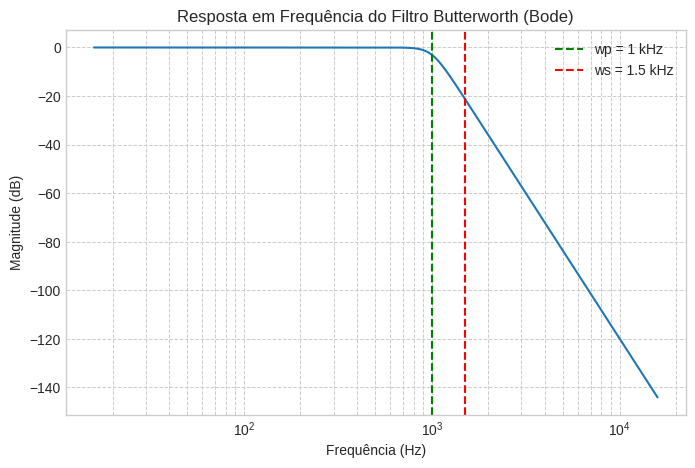

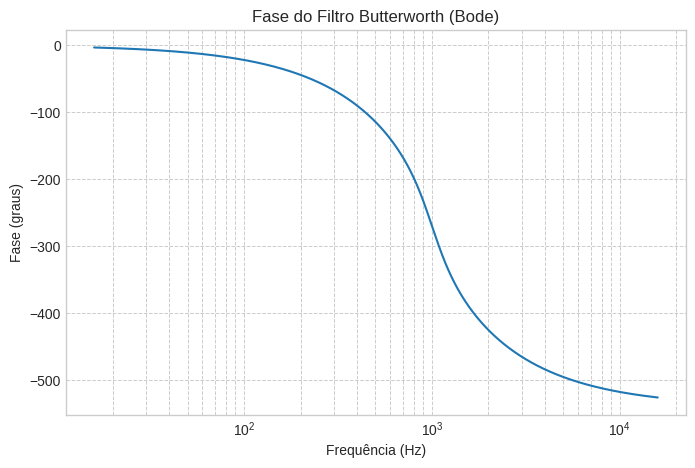

In [ ]:
# ==============================================================
# Exemplo 1: Filtro Passa-Baixas Butterworth (usando signal.bode)
# ==============================================================

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# ------------------------------
# Especificações do filtro
# ------------------------------
wp = 2 * np.pi * 1000   # Frequência de passagem (rad/s)
ws = 2 * np.pi * 1500   # Frequência de rejeição (rad/s)
ap = 3                  # Atenuação máxima na banda passante (dB)
as_ = 20                # Atenuação mínima na banda de rejeição (dB)

# ------------------------------
# Projeto do filtro
# ------------------------------
n, Wn = signal.buttord(wp, ws, ap, as_, analog=True)
sos = signal.butter(n, Wn, btype='lowpass', analog=True, output='sos')

print("==================================================")
print("Ordem do Filtro:", n)
print("Frequência de corte Wn (rad/s):", Wn)
print("Matriz SOS:")
print(np.round(sos, 4))
print("==================================================")

# ------------------------------
# Converter SOS -> (b, a)
# ------------------------------
b, a = signal.sos2tf(sos)

# ------------------------------
# Resposta em frequência com Bode
# ------------------------------
w, mag, phase = signal.bode((b, a), w=np.logspace(2, 5, 2000))  # 100 Hz a 100 kHz

# Gráfico de magnitude
plt.figure(figsize=(8, 5))
plt.semilogx(w/(2*np.pi), mag)  # mag já está em dB
plt.title('Resposta em Frequência do Filtro Butterworth (Bode)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', linestyle='--', linewidth=0.7)
plt.axvline(1000, color='green', linestyle='--', label='wp = 1 kHz')
plt.axvline(1500, color='red', linestyle='--', label='ws = 1.5 kHz')
plt.legend()
plt.show()

# Gráfico de fase
plt.figure(figsize=(8, 5))
plt.semilogx(w/(2*np.pi), phase)
plt.title('Fase do Filtro Butterworth (Bode)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase (graus)')
plt.grid(which='both', linestyle='--', linewidth=0.7)
plt.show()


Ordem do Filtro: 4
Frequência de corte Wn (rad/s): 7914.180222243629
Coeficientes (b): [1.00000000e+00 0.00000000e+00 6.26342486e+07 0.00000000e+00
 4.90381137e+14]
Coeficientes (a): [1.00000000e+00 2.54916391e+04 3.87546081e+08 3.45804714e+12
 1.55072131e+16]


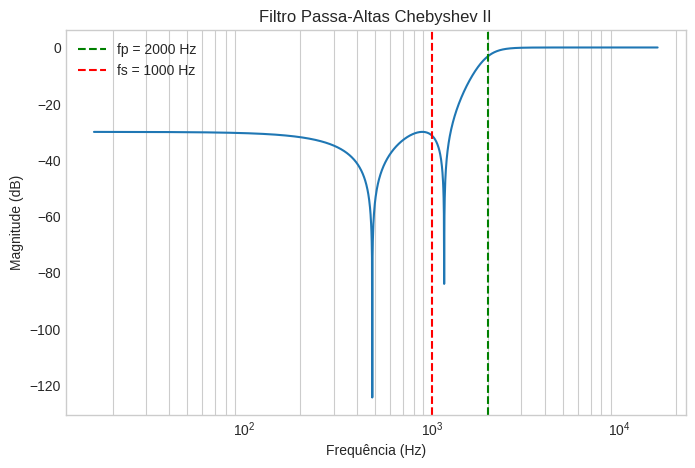

In [ ]:
# ==============================================================
# Exemplo 2: Filtro Passa-Altas Chebyshev II
# ==============================================================

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# ------------------------------
# Especificações do filtro
# ------------------------------
fp = 2000   # Frequência de passagem (Hz)
fs = 1000   # Frequência de rejeição (Hz)
ap = 3      # Atenuação máxima na banda passante (dB)
as_ = 30    # Atenuação mínima na banda de rejeição (dB)

# Converter para rad/s (analógico)
wp = 2 * np.pi * fp
ws = 2 * np.pi * fs

# ------------------------------
# Projeto do filtro Chebyshev II
# ------------------------------
n, Wn = signal.cheb2ord(wp, ws, ap, as_, analog=True)
b, a = signal.cheby2(n, as_, Wn, btype='highpass', analog=True, output='ba')

print("==================================================")
print("Ordem do Filtro:", n)
print("Frequência de corte Wn (rad/s):", Wn)
print("Coeficientes (b):", b)
print("Coeficientes (a):", a)
print("==================================================")

# ------------------------------
# Resposta em frequência
# ------------------------------
w, h = signal.freqs(b, a, worN=2000)

plt.figure(figsize=(8,5))
plt.semilogx(w/(2*np.pi), 20*np.log10(abs(h)))
plt.title('Filtro Passa-Altas Chebyshev II')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', axis='both')
plt.axvline(fp, color='green', linestyle='--', label='fp = 2000 Hz')
plt.axvline(fs, color='red', linestyle='--', label='fs = 1000 Hz')
plt.legend()
plt.show()


Ordem do Filtro: 5
Frequências críticas Wn (rad/s): [ 1884.95559215 18849.55592154]
Coeficientes (b): [1.72588098e+20 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Coeficientes (a): [1.00000000e+00 1.58927791e+04 6.63690174e+08 7.01608282e+12
 1.12515963e+17 6.31032241e+20 3.99775695e+24 8.85725604e+27
 2.97695401e+31 2.53284627e+34 5.66253932e+37]


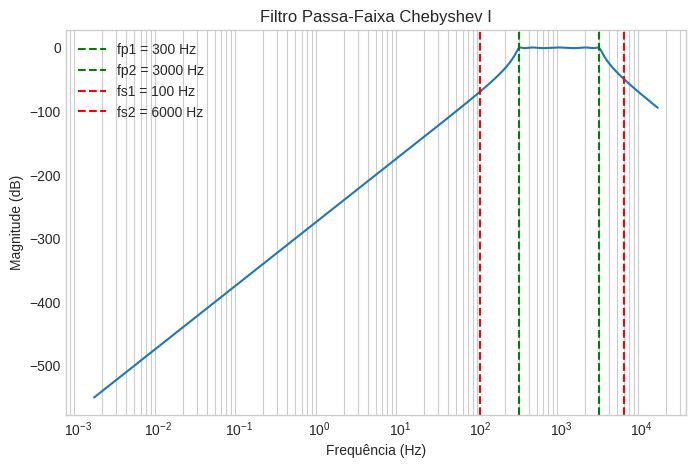

In [ ]:
# ==============================================================
# Exemplo 3: Filtro Passa-Faixa Chebyshev I
# ==============================================================


import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# ------------------------------
# Especificações do filtro
# ------------------------------
fp = [300, 3000]   # Frequências de passagem (Hz)
fs = [100, 6000]   # Frequências de rejeição (Hz)
ap = 1             # Atenuação máxima na banda passante (dB)
as_ = 40           # Atenuação mínima na banda de rejeição (dB)

# Converter para rad/s (analógico)
wp = [2 * np.pi * f for f in fp]
ws = [2 * np.pi * f for f in fs]

# ------------------------------
# Projeto do filtro Chebyshev I
# ------------------------------
n, Wn = signal.cheb1ord(wp, ws, ap, as_, analog=True)
b, a = signal.cheby1(n, ap, Wn, btype='bandpass', analog=True, output='ba')

print("==================================================")
print("Ordem do Filtro:", n)
print("Frequências críticas Wn (rad/s):", Wn)
print("Coeficientes (b):", b)
print("Coeficientes (a):", a)
print("==================================================")

# ------------------------------
# Resposta em frequência
# ------------------------------
w, h = signal.freqs(b, a, worN=2000)

plt.figure(figsize=(8,5))
plt.semilogx(w/(2*np.pi), 20*np.log10(abs(h)))
plt.title('Filtro Passa-Faixa Chebyshev I')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', axis='both')
plt.axvline(fp[0], color='green', linestyle='--', label='fp1 = 300 Hz')
plt.axvline(fp[1], color='green', linestyle='--', label='fp2 = 3000 Hz')
plt.axvline(fs[0], color='red', linestyle='--', label='fs1 = 100 Hz')
plt.axvline(fs[1], color='red', linestyle='--', label='fs2 = 6000 Hz')
plt.legend()
plt.show()


Ordem do Filtro: 5
Frequências críticas Wn (rad/s): [320.89124169 439.82295462]
Coeficientes (b): [1.00000000e+00 0.00000000e+00 7.15384671e+05 0.00000000e+00
 2.03322570e+11 0.00000000e+00 2.86959989e+16 0.00000000e+00
 2.01116127e+21 0.00000000e+00 5.59988073e+25]
Coeficientes (a): [1.00000000e+00 4.57924422e+02 7.87521864e+05 2.74768049e+08
 2.34847459e+11 5.94444900e+13 3.31452746e+16 5.47315492e+18
 2.21396059e+21 1.81692428e+23 5.59988073e+25]


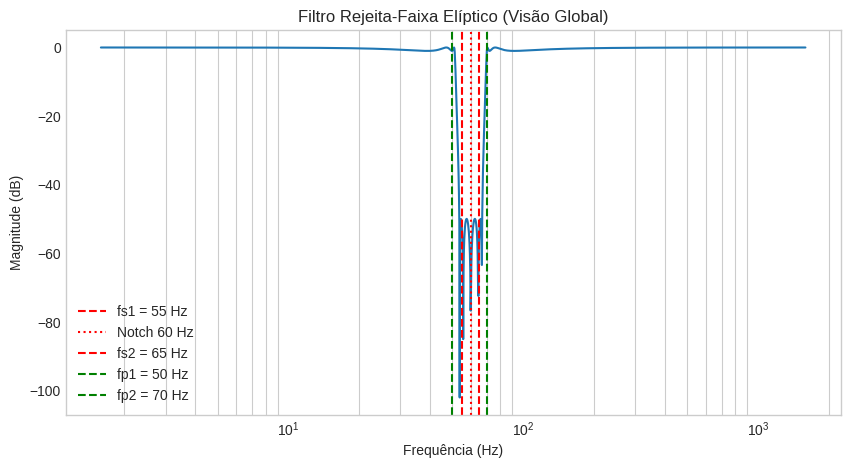

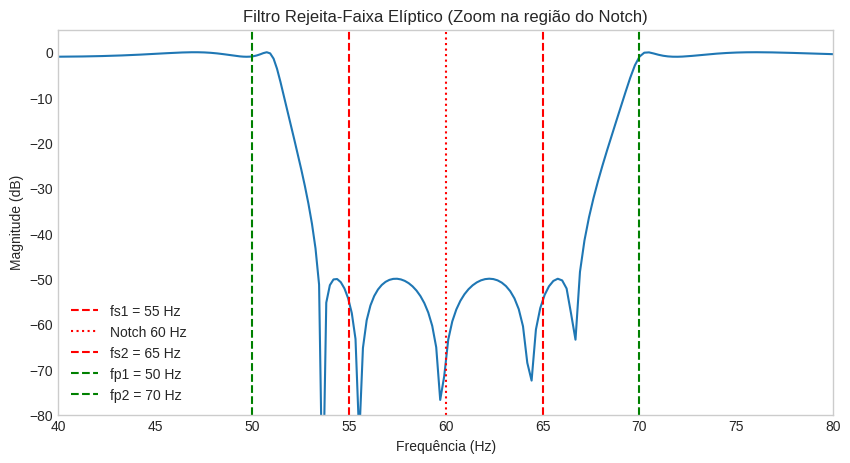

In [ ]:
# ==============================================================
# Exemplo 4: Filtro Rejeita-Faixa Elíptico
# ==============================================================
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# ======================================================
# Especificações do filtro
# ======================================================
fp = [50, 70]     # Frequências de passagem (Hz)
fs = [55, 65]     # Frequências de rejeição (Hz) -> Notch 60 Hz
ap = 1            # Atenuação máxima na banda passante (dB)
as_ = 50          # Atenuação mínima na banda de rejeição (dB)

# Converter para rad/s (analógico)
wp = [2 * np.pi * f for f in fp]
ws = [2 * np.pi * f for f in fs]

# ======================================================
# Projeto do filtro Elíptico Rejeita-Faixa
# ======================================================
n, Wn = signal.ellipord(wp, ws, ap, as_, analog=True)
b, a = signal.ellip(n, ap, as_, Wn, btype='bandstop', analog=True, output='ba')

print("==================================================")
print("Ordem do Filtro:", n)
print("Frequências críticas Wn (rad/s):", Wn)
print("Coeficientes (b):", b)
print("Coeficientes (a):", a)
print("==================================================")

# ======================================================
# Resposta em frequência
# ======================================================
w, h = signal.freqs(b, a, worN=2000)
freqs = w / (2*np.pi)   # converter de rad/s para Hz

# ======================================================
# Plot 1: Resposta global (escala log)
# ======================================================
plt.figure(figsize=(10,5))
plt.semilogx(freqs, 20*np.log10(abs(h)))
plt.title('Filtro Rejeita-Faixa Elíptico (Visão Global)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', axis='both')
plt.axvline(fs[0], color='red', linestyle='--', label='fs1 = 55 Hz')
plt.axvline(60, color='red', linestyle=':', label='Notch 60 Hz')
plt.axvline(fs[1], color='red', linestyle='--', label='fs2 = 65 Hz')
plt.axvline(fp[0], color='green', linestyle='--', label='fp1 = 50 Hz')
plt.axvline(fp[1], color='green', linestyle='--', label='fp2 = 70 Hz')
plt.legend()
plt.show()

# ======================================================
# Plot 2: Zoom linear (40–80 Hz)
# ======================================================
plt.figure(figsize=(10,5))
plt.plot(freqs, 20*np.log10(abs(h)))
plt.title('Filtro Rejeita-Faixa Elíptico (Zoom na região do Notch)')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude (dB)')
plt.grid(which='both', axis='both')
plt.axvline(fs[0], color='red', linestyle='--', label='fs1 = 55 Hz')
plt.axvline(60, color='red', linestyle=':', label='Notch 60 Hz')
plt.axvline(fs[1], color='red', linestyle='--', label='fs2 = 65 Hz')
plt.axvline(fp[0], color='green', linestyle='--', label='fp1 = 50 Hz')
plt.axvline(fp[1], color='green', linestyle='--', label='fp2 = 70 Hz')
plt.xlim(40, 80)   # foco no intervalo crítico
plt.ylim(-80, 5)   # zoom na magnitude
plt.legend()
plt.show()
